# cloning the repository

In [1]:
!git clone https://github.com/katipallyvig8899/ERA.git

Cloning into 'ERA'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), 77.06 KiB | 3.67 MiB/s, done.


In [4]:
cd "/content/ERA"

/content/ERA


In [5]:
pwd


'/content/ERA'

In [6]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import model

In [ ]:
#import utils

In [7]:
!python model.py

In [8]:
!python utils.py

In [9]:
from model import *
from utils import *

In [10]:
# Checking cuda availability
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


In [11]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=False, transform=test_transforms)
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 1, 'pin_memory': True}


train_loader = torch.utils.data.DataLoader(train_data, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)

100%|██████████| 9912422/9912422 [00:00<00:00, 110670242.24it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 48357562.40it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 39140499.38it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 7485472.99it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



# printing the train data images with labels

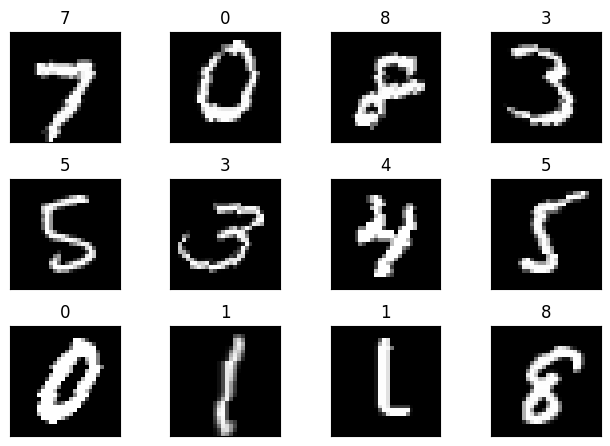

In [12]:
#import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

# calling the model function and printing the summary

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


# Training and Testing the model

In [14]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
num_epochs = 25

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer)
  scheduler.step()
  test(model, device, test_loader)
  

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=1.5915 Batch_id=117 Accuracy=35.54: 100%|██████████| 118/118 [00:26<00:00,  4.41it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 1.5098, Accuracy: 6155/10000 (61.55%)

Epoch 2


Train: Loss=0.2229 Batch_id=117 Accuracy=88.34: 100%|██████████| 118/118 [00:27<00:00,  4.33it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.1153, Accuracy: 9649/10000 (96.49%)

Epoch 3


Train: Loss=0.0887 Batch_id=117 Accuracy=95.29: 100%|██████████| 118/118 [00:27<00:00,  4.34it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0782, Accuracy: 9753/10000 (97.53%)

Epoch 4


Train: Loss=0.1413 Batch_id=117 Accuracy=96.48: 100%|██████████| 118/118 [00:27<00:00,  4.23it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0562, Accuracy: 9819/10000 (98.19%)

Epoch 5


Train: Loss=0.2021 Batch_id=117 Accuracy=97.03: 100%|██████████| 118/118 [00:27<00:00,  4.34it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0504, Accuracy: 9844/10000 (98.44%)

Epoch 6


Train: Loss=0.0978 Batch_id=117 Accuracy=97.45: 100%|██████████| 118/118 [00:27<00:00,  4.31it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0461, Accuracy: 9849/10000 (98.49%)

Epoch 7


Train: Loss=0.0860 Batch_id=117 Accuracy=97.73: 100%|██████████| 118/118 [00:27<00:00,  4.29it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0385, Accuracy: 9882/10000 (98.82%)

Epoch 8


Train: Loss=0.0267 Batch_id=117 Accuracy=97.89: 100%|██████████| 118/118 [00:27<00:00,  4.32it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0421, Accuracy: 9868/10000 (98.68%)

Epoch 9


Train: Loss=0.0629 Batch_id=117 Accuracy=98.09: 100%|██████████| 118/118 [00:27<00:00,  4.22it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0340, Accuracy: 9887/10000 (98.87%)

Epoch 10


Train: Loss=0.0293 Batch_id=117 Accuracy=98.29: 100%|██████████| 118/118 [00:27<00:00,  4.30it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0298, Accuracy: 9906/10000 (99.06%)

Epoch 11


Train: Loss=0.0589 Batch_id=117 Accuracy=98.46: 100%|██████████| 118/118 [00:27<00:00,  4.32it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0309, Accuracy: 9900/10000 (99.00%)

Epoch 12


Train: Loss=0.0547 Batch_id=117 Accuracy=98.52: 100%|██████████| 118/118 [00:27<00:00,  4.36it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0273, Accuracy: 9914/10000 (99.14%)

Epoch 13


Train: Loss=0.0813 Batch_id=117 Accuracy=98.50: 100%|██████████| 118/118 [00:26<00:00,  4.38it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0298, Accuracy: 9905/10000 (99.05%)

Epoch 14


Train: Loss=0.0702 Batch_id=117 Accuracy=98.61: 100%|██████████| 118/118 [00:26<00:00,  4.39it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0268, Accuracy: 9924/10000 (99.24%)

Epoch 15


Train: Loss=0.0260 Batch_id=117 Accuracy=98.75: 100%|██████████| 118/118 [00:26<00:00,  4.39it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0296, Accuracy: 9907/10000 (99.07%)

Epoch 16


Train: Loss=0.0490 Batch_id=117 Accuracy=98.89: 100%|██████████| 118/118 [00:27<00:00,  4.35it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0222, Accuracy: 9933/10000 (99.33%)

Epoch 17


Train: Loss=0.0964 Batch_id=117 Accuracy=98.99: 100%|██████████| 118/118 [00:27<00:00,  4.28it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0224, Accuracy: 9929/10000 (99.29%)

Epoch 18


Train: Loss=0.0177 Batch_id=117 Accuracy=99.03: 100%|██████████| 118/118 [00:26<00:00,  4.38it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0215, Accuracy: 9929/10000 (99.29%)

Epoch 19


Train: Loss=0.0240 Batch_id=117 Accuracy=99.05: 100%|██████████| 118/118 [00:26<00:00,  4.39it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0215, Accuracy: 9932/10000 (99.32%)

Epoch 20


Train: Loss=0.0527 Batch_id=117 Accuracy=99.01: 100%|██████████| 118/118 [00:27<00:00,  4.36it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0214, Accuracy: 9928/10000 (99.28%)

Epoch 21


Train: Loss=0.0445 Batch_id=117 Accuracy=98.97: 100%|██████████| 118/118 [00:26<00:00,  4.38it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0212, Accuracy: 9931/10000 (99.31%)

Epoch 22


Train: Loss=0.0231 Batch_id=117 Accuracy=99.02: 100%|██████████| 118/118 [00:27<00:00,  4.37it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0216, Accuracy: 9932/10000 (99.32%)

Epoch 23


Train: Loss=0.0321 Batch_id=117 Accuracy=98.99: 100%|██████████| 118/118 [00:26<00:00,  4.41it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0210, Accuracy: 9931/10000 (99.31%)

Epoch 24


Train: Loss=0.0277 Batch_id=117 Accuracy=99.06: 100%|██████████| 118/118 [00:26<00:00,  4.38it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0214, Accuracy: 9930/10000 (99.30%)

Epoch 25


Train: Loss=0.0109 Batch_id=117 Accuracy=99.03: 100%|██████████| 118/118 [00:27<00:00,  4.35it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0213, Accuracy: 9935/10000 (99.35%)



# Visualization


Text(0.5, 1.0, 'Test Accuracy')

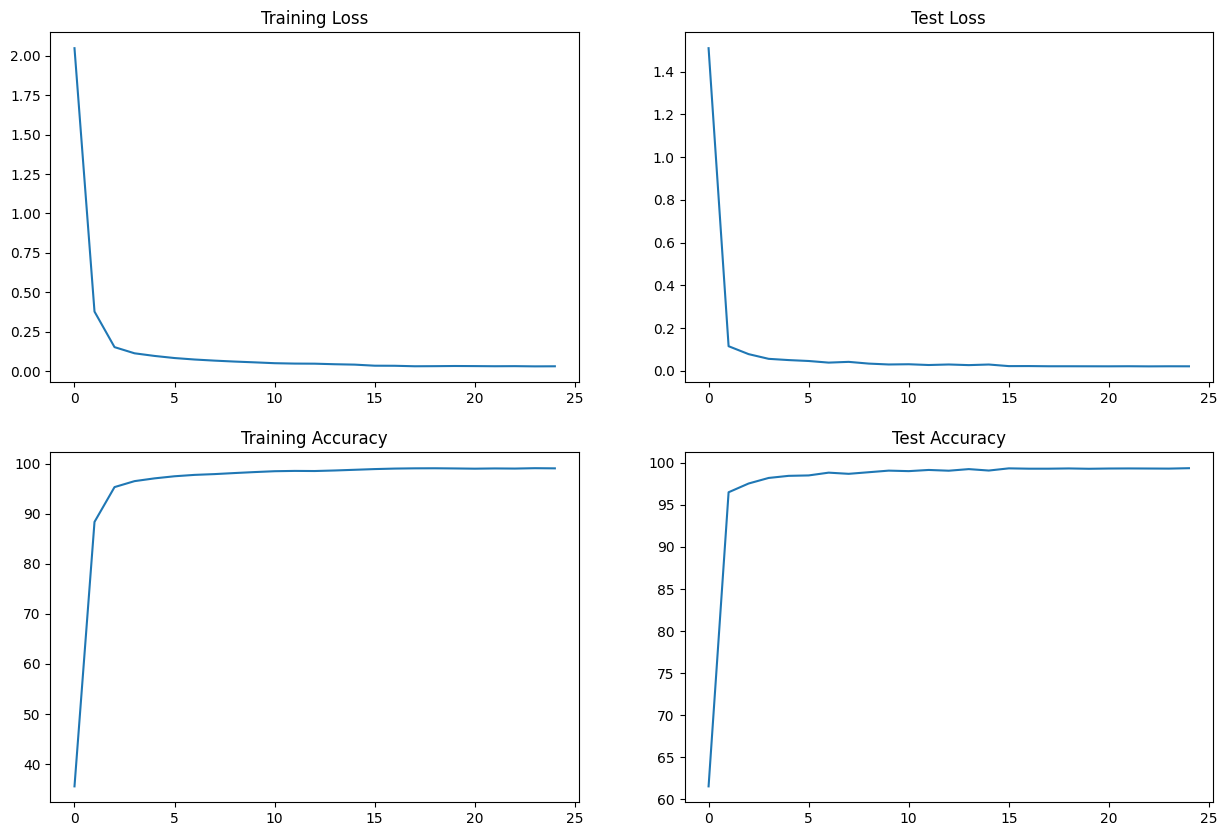

In [15]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")